In [2]:
# Author : Jay Patel
"""
This is Subnero Modem Basic Functionality Check Test as well as Python API Testing. 
Reference: Prasad Anjangi,"https://blog.unetstack.net/basic-modem-operations-using-unetstack". 
"""

import sys
import numpy as np
import arlpy as ap
from unetpy import *

In [3]:
# Open a connection to modem
ip_address = '192.168.0.26'

sock = UnetSocket(ip_address, 1100)
modem = sock.getGateway()

In [4]:
# Connection to Node 1

node1 = modem.agentForService(Services.NODE_INFO)

In [5]:
#  Node information
node1

<<< Node information >>>

Manages and maintains node information and attributes.

[org.arl.unet.nodeinfo.NodeInfoParam]
  address = 1
  addressSize = 8
  canForward = True
  diveRate = 0.0
  heading = 0.0
  location = [D(...)
  mobility = False
  nodeName = 1
  origin = [D(...)
  pitch = 0.0
  roll = 0.0
  speed = 0.0
  time ⤇ 1606455237857
  turnRate = 0.0


In [6]:
# Looking for agent who provides physical services
phy = modem.agentForService(Services.PHYSICAL)

In [7]:
# Physical layer information

phy

<<< Physical layer >>>

Provides software-defined physical layer communication services (including error detection & correction).

[org.arl.unet.DatagramParam]
  MTU ⤇ 31
  RTU ⤇ 31

[org.arl.unet.bb.BasebandParam]
  basebandRate ⤇ 12000.0
  carrierFrequency = 12000.0
  maxPreambleID ⤇ 4
  maxSignalLength ⤇ 2147483647
  signalPowerLevel = -10.0

[org.arl.unet.phy.PhysicalParam]
  busy ⤇ False
  maxPowerLevel ⤇ 0.0
  minPowerLevel ⤇ -138.0
  propagationSpeed = 1500.0
  refPowerLevel ⤇ 0.0
  rxEnable = True
  rxSensitivity ⤇ 0.0
  time = 10192559772
  timestampedTxDelay = 1.0

[org.arl.unet.scheduler.SchedulerParam]
  rtc = 1606455244466
  wakeOnAcoustic = False
  wakeOnEthernet = False
  wakeOnIO = False
  wakeOnRS232 = False

[org.arl.yoda.ModemParam]
  adcrate ⤇ 48000.0
  bbsblk ⤇ 6000
  bbscnt = 0
  bpfilter = True
  clockCalib = 1.0
  dacrate ⤇ 96000.0
  downconvRatio = 4.0
  fan = False
  fanctl = 45.0
  fullduplex = True
  gain = 0.0
  hpc = False
  inhibit = 120
  isc = True
  lo

In [8]:
# Transmit a CONTROL packet (phy.CONTROL)
phy << TxFrameReq(type = 1, data= np.arange(4))

Message:AGREE[sentAt:1606455283729]

In [9]:
# Receive the transmit notification
txntf1 = modem.receive(TxFrameNtf, 5000)
if txntf1 is not None:
    # Extract the transmission start time
    txtime = txntf1.txTime
    print('The transmission started at ' + str(txtime))
else:
    print('Transmission not successfull, try again!')


The transmission started at 10232651766


In [10]:
# Transmit a DATA packet (phy.DATA)
phy << TxFrameReq(type = 2, data=np.arange(10))

Message:AGREE[sentAt:1606455304750]

In [11]:
# Receive the transmit notification
txntf2 = modem.receive(TxFrameNtf, 5000)
if txntf2 is not None:
    # Extract the transmission start time
    txtime = txntf2.txTime
    print('The transmission started at ' + str(txtime))
else:
    print('Transmission not successfull, try again!')

The transmission started at 10253697099


In [12]:
################### Transmission of baseband signal ##########################

In [13]:
# Look for agents poviding baseband service 
bb = modem.agentForService(Services.BASEBAND)

In [14]:
bb

<<< Physical layer >>>

Provides software-defined physical layer communication services (including error detection & correction).

[org.arl.unet.DatagramParam]
  MTU ⤇ 31
  RTU ⤇ 31

[org.arl.unet.bb.BasebandParam]
  basebandRate ⤇ 12000.0
  carrierFrequency = 12000.0
  maxPreambleID ⤇ 4
  maxSignalLength ⤇ 2147483647
  signalPowerLevel = -10.0

[org.arl.unet.phy.PhysicalParam]
  busy ⤇ False
  maxPowerLevel ⤇ 0.0
  minPowerLevel ⤇ -138.0
  propagationSpeed = 1500.0
  refPowerLevel ⤇ 0.0
  rxEnable = True
  rxSensitivity ⤇ 0.0
  time = 10262937105
  timestampedTxDelay = 1.0

[org.arl.unet.scheduler.SchedulerParam]
  rtc = 1606455314842
  wakeOnAcoustic = False
  wakeOnEthernet = False
  wakeOnIO = False
  wakeOnRS232 = False

[org.arl.yoda.ModemParam]
  adcrate ⤇ 48000.0
  bbsblk ⤇ 6000
  bbscnt = 0
  bpfilter = True
  clockCalib = 1.0
  dacrate ⤇ 96000.0
  downconvRatio = 4.0
  fan = False
  fanctl = 45.0
  fullduplex = True
  gain = 0.0
  hpc = False
  inhibit = 120
  isc = True
  lo

In [15]:
import arlpy.plot as plt

# Generate a random signal modulated with BPSK
csig = ap.comms.modulate(ap.comms.random_data(10000), ap.comms.psk())

In [16]:
plt.plot(csig[0:1000].real,title="random signal modulated with BPSK", width=900)

In [17]:
# Convert complex signal (csig) with real and imag to an array
# with alternate real and imag values
real_csig = csig.real
imag_csig = csig.imag
signal = np.empty((real_csig.size + imag_csig.size,), dtype=real_csig.dtype)
signal[0::2] = real_csig
signal[1::2] = imag_csig

In [18]:
plt.plot(real_csig[0:500].real,title="random signal real part", width=900)

In [19]:
plt.plot(imag_csig[0:1500],title="random signal imag part", width=900)

In [20]:
# both component of signal 
plt.plot(signal[0:500],title ="Both component of signal", width = 900)

In [21]:
# Transmit the baseband signal
bb << TxBasebandSignalReq(preamble=3, signal=signal)

Message:AGREE[sentAt:1606455351453]

In [22]:
# Receive the transmit notification
txntf3 = modem.receive(TxFrameNtf, 5000)
if txntf3 is not None:
    # Extract the transmission start time
    txtime = txntf3.txTime
    print('The transmission started at ' + str(txtime))
else:
    print('Transmission not successfull, try again!')


The transmission started at 10300381098


In [23]:
rxntf = modem.receive(RxFrameNtf, 5000)
print(rxntf.data)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [24]:
################### Recording a baseband signal #################################

In [25]:
# Record a baseband signal
bb << RecordBasebandSignalReq(recLength=12000)
# Receive the notification when the signal is recorded
rxntf = modem.receive(RxBasebandSignalNtf, 5000)
if rxntf is not None:
    # Extract the recorded signal
    rec_signal = rxntf.signal
    print('Recorded signal successfully!')
    # The recorded signal saved in `rec_signal` variable
    # can be processed as required by the user.
else:
    print('Recording not successfull, try again!')

Recorded signal successfully!


In [26]:
rec_signal

array([-4.40915435e-04+5.50438650e-04j, -2.85920214e-05-5.90864292e-05j,
       -1.72308600e-03+4.39221971e-04j, ...,
       -1.05560370e-01+1.05348751e-01j, -1.13964617e-01+3.85424159e-02j,
        1.31091354e-02-8.36829320e-02j])

In [28]:
plt.plot(rec_signal.real, title="recorded signal", width=900)

In [29]:
################### Transmit and record a signal ##########################

In [30]:
# Load the baseband signal to be transmitted.
# signal.txt contains the same signal as csig in previous section
# Format: array with alternate real and imag values

In [32]:
tx_signal = np.genfromtxt('signals/signal.txt', delimiter=',')

In [33]:
# Transmit the baseband signal
bb << TxBasebandSignalReq(preamble=3, signal=tx_signal)

txntf4 = modem.receive(TxFrameNtf, 5000)
if txntf4 is not None:
    # Request a recording from txTime onwards for a duration of 2x the original transmitted signal.
    bb << RecordBasebandSignalReq(recTime=txntf4.txTime, recLength=(len(tx_signal)*2))
else:
    print('Transmission not successfull, try again!')

In [34]:
# Read the receive notification
rxntf4 = modem.receive(RxBasebandSignalNtf, 5000)

if rxntf is not None:
    # Extract the recorded signal
    rec_signal = rxntf4.signal
    print('Successfully recorded signal after transmission!')
    # The recorded signal is saved in `rec_signal` variable
    # It can be processed as required by the user.
else:
    print('Recording not successfull, try again!')

Successfully recorded signal after transmission!


In [35]:
plt.plot(rec_signal, title="recorded signal", width=900)

In [36]:
import matplotlib.pyplot as mplt

import scipy.interpolate

%matplotlib inline

In [35]:
## OFDM signal Generation. Ref: https://dspillustrations.com/pages/posts/misc/python-ofdm-example.html

K = 64 # number of OFDM subcarriers

In [36]:
CP = K//4  # length of the cyclic prefix: 25% of the block

In [37]:
P = 8 # number of pilot carriers per OFDM block
pilotValue = 3+3j # The known value each pilot transmits

allCarriers:   [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]

pilotCarriers: [ 0  8 16 24 32 40 48 56 63]

dataCarriers:  [ 1  2  3  4  5  6  7  9 10 11 12 13 14 15 17 18 19 20 21 22 23 25 26 27
 28 29 30 31 33 34 35 36 37 38 39 41 42 43 44 45 46 47 49 50 51 52 53 54
 55 57 58 59 60 61 62]



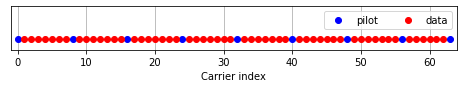

In [38]:
allCarriers = np.arange(K)  # indices of all subcarriers ([0, 1, ... K-1])

pilotCarriers = allCarriers[::K//P] # Pilots is every (K/P)th carrier.

# For convenience of channel estimation, let's make the last carriers also be a pilot
pilotCarriers = np.hstack([pilotCarriers, np.array([allCarriers[-1]])])
P = P+1

# data carriers are all remaining carriers
dataCarriers = np.delete(allCarriers, pilotCarriers)

print ("allCarriers:   %s\n" % allCarriers)
print ("pilotCarriers: %s\n" % pilotCarriers)
print ("dataCarriers:  %s\n" % dataCarriers)
mplt.figure(figsize=(8,0.8))
mplt.plot(pilotCarriers, np.zeros_like(pilotCarriers), 'bo', label='pilot')
mplt.plot(dataCarriers, np.zeros_like(dataCarriers), 'ro', label='data')
mplt.legend(fontsize=10, ncol=2)
mplt.xlim((-1,K)); mplt.ylim((-0.1, 0.3))
mplt.xlabel('Carrier index')
mplt.yticks([])
mplt.grid(True);


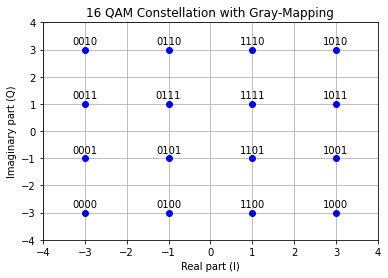

In [39]:
mu = 4 # bits per symbol (i.e. 16QAM)
payloadBits_per_OFDM = len(dataCarriers)*mu  # number of payload bits per OFDM symbol

mapping_table = {
    (0,0,0,0) : -3-3j,
    (0,0,0,1) : -3-1j,
    (0,0,1,0) : -3+3j,
    (0,0,1,1) : -3+1j,
    (0,1,0,0) : -1-3j,
    (0,1,0,1) : -1-1j,
    (0,1,1,0) : -1+3j,
    (0,1,1,1) : -1+1j,
    (1,0,0,0) :  3-3j,
    (1,0,0,1) :  3-1j,
    (1,0,1,0) :  3+3j,
    (1,0,1,1) :  3+1j,
    (1,1,0,0) :  1-3j,
    (1,1,0,1) :  1-1j,
    (1,1,1,0) :  1+3j,
    (1,1,1,1) :  1+1j
}
for b3 in [0, 1]:
    for b2 in [0, 1]:
        for b1 in [0, 1]:
            for b0 in [0, 1]:
                B = (b3, b2, b1, b0)
                Q = mapping_table[B]
                mplt.plot(Q.real, Q.imag, 'bo')
                mplt.text(Q.real, Q.imag+0.2, "".join(str(x) for x in B), ha='center')
mplt.grid(True)
mplt.xlim((-4, 4)); mplt.ylim((-4,4)); mplt.xlabel('Real part (I)'); mplt.ylabel('Imaginary part (Q)')
mplt.title('16 QAM Constellation with Gray-Mapping');

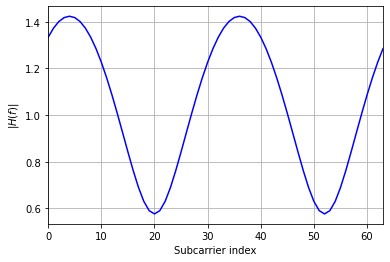

In [40]:
channelResponse = np.array([1, 0, 0.3+0.3j])  # the impulse response of the wireless channel
H_exact = np.fft.fft(channelResponse, K)
mplt.plot(allCarriers, abs(H_exact),'b')
mplt.xlabel('Subcarrier index'); mplt.ylabel('$|H(f)|$'); mplt.grid(True); mplt.xlim(0, K-1)

SNRdb = 25  # signal to noise-ratio in dB at the receiver 

In [41]:
bits = np.random.binomial(n=1, p=0.5, size=(payloadBits_per_OFDM, ))
print ("Bits count: \n", len(bits))
print ("First 20 bits: \n", bits[:20])
print ("Mean of bits (should be around 0.5): \n", np.mean(bits))

Bits count: 
 220
First 20 bits: 
 [0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1]
Mean of bits (should be around 0.5): 
 0.5590909090909091


In [42]:
def SP(bits):
    return bits.reshape((len(dataCarriers), mu))
bits_SP = SP(bits)
print ("First 5 bit groups")
print (bits_SP[:5,:])

First 5 bit groups
[[0 0 0 0]
 [0 0 1 1]
 [0 0 0 0]
 [1 1 1 1]
 [1 0 1 1]]


In [43]:
def Mapping(bits):
    return np.array([mapping_table[tuple(b)] for b in bits])
QAM = Mapping(bits_SP)
print ("First 5 QAM symbols and bits:")
print (bits_SP[:5,:])
print (QAM[:5])

First 5 QAM symbols and bits:
[[0 0 0 0]
 [0 0 1 1]
 [0 0 0 0]
 [1 1 1 1]
 [1 0 1 1]]
[-3.-3.j -3.+1.j -3.-3.j  1.+1.j  3.+1.j]


In [44]:
def OFDM_symbol(QAM_payload):
    symbol = np.zeros(K, dtype=complex) # the overall K subcarriers
    symbol[pilotCarriers] = pilotValue  # allocate the pilot subcarriers 
    symbol[dataCarriers] = QAM_payload  # allocate the pilot subcarriers
    return symbol
OFDM_data = OFDM_symbol(QAM)
print ("Number of OFDM carriers in frequency domain: ", len(OFDM_data))

Number of OFDM carriers in frequency domain:  64


In [45]:
def IDFT(OFDM_data):
    return np.fft.ifft(OFDM_data)
OFDM_time = IDFT(OFDM_data)
print ("Number of OFDM samples in time-domain before CP: ", len(OFDM_time))

Number of OFDM samples in time-domain before CP:  64


In [46]:
def addCP(OFDM_time):
    cp = OFDM_time[-CP:]               # take the last CP samples ...
    return np.hstack([cp, OFDM_time])  # ... and add them to the beginning
OFDM_withCP = addCP(OFDM_time)
print ("Number of OFDM samples in time domain with CP: ", len(OFDM_withCP))

Number of OFDM samples in time domain with CP:  80


RX Signal power: 0.1724. Noise power: 0.0005


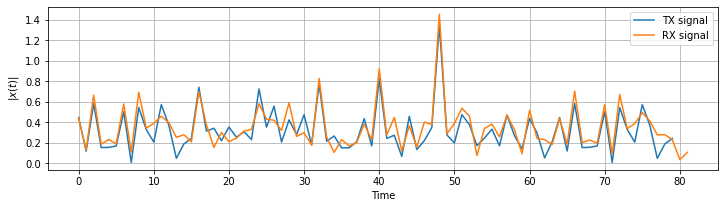

In [47]:
def channel(signal):
    convolved = np.convolve(signal, channelResponse)
    signal_power = np.mean(abs(convolved**2))
    sigma2 = signal_power * 10**(-SNRdb/10)  # calculate noise power based on signal power and SNR
    
    print ("RX Signal power: %.4f. Noise power: %.4f" % (signal_power, sigma2))
    
    # Generate complex noise with given variance
    noise = np.sqrt(sigma2/2) * (np.random.randn(*convolved.shape)+1j*np.random.randn(*convolved.shape))
    return convolved + noise
OFDM_TX = OFDM_withCP
OFDM_RX = channel(OFDM_TX)
mplt.figure(figsize=(12,3))
mplt.plot(abs(OFDM_TX), label='TX signal')
mplt.plot(abs(OFDM_RX), label='RX signal')
mplt.legend(fontsize=10)
mplt.xlabel('Time'); mplt.ylabel('$|x(t)|$');
mplt.grid(True);

In [48]:
def removeCP(signal):
    return signal[CP:(CP+K)]
OFDM_RX_noCP = removeCP(OFDM_RX)

In [49]:
def DFT(OFDM_RX):
    return np.fft.fft(OFDM_RX)
OFDM_demod = DFT(OFDM_RX_noCP)

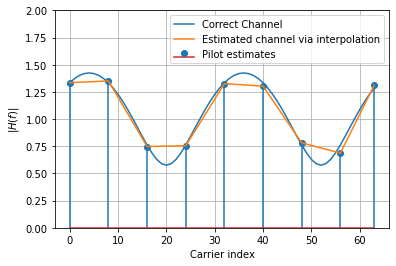

In [50]:
def channelEstimate(OFDM_demod):
    pilots = OFDM_demod[pilotCarriers]  # extract the pilot values from the RX signal
    Hest_at_pilots = pilots / pilotValue # divide by the transmitted pilot values
    
    # Perform interpolation between the pilot carriers to get an estimate
    # of the channel in the data carriers. Here, we interpolate absolute value and phase 
    # separately
    Hest_abs = scipy.interpolate.interp1d(pilotCarriers, abs(Hest_at_pilots), kind='linear')(allCarriers)
    Hest_phase = scipy.interpolate.interp1d(pilotCarriers, np.angle(Hest_at_pilots), kind='linear')(allCarriers)
    Hest = Hest_abs * np.exp(1j*Hest_phase)
    
    mplt.plot(allCarriers, abs(H_exact), label='Correct Channel')
    mplt.stem(pilotCarriers, abs(Hest_at_pilots), label='Pilot estimates')
    mplt.plot(allCarriers, abs(Hest), label='Estimated channel via interpolation')
    mplt.grid(True); mplt.xlabel('Carrier index'); mplt.ylabel('$|H(f)|$'); mplt.legend(fontsize=10)
    mplt.ylim(0,2)
    
    return Hest
Hest = channelEstimate(OFDM_demod)

In [51]:
################### Transmit and record OFDM signal ##########################

In [52]:
# Transmit the baseband signal
bb << TxBasebandSignalReq(preamble=1, signal=OFDM_withCP)

txntf4 = modem.receive(TxFrameNtf, 5000)
if txntf4 is not None:
    # Request a recording from txTime onwards for a duration of 2x the original transmitted signal.
    bb << RecordBasebandSignalReq(recTime=txntf4.txTime, recLength=(len(tx_signal)*2))
else:
    print('Transmission not successfull, try again!')

In [53]:
# Read the receive notification
rxntf4 = modem.receive(RxBasebandSignalNtf, 5000)

if rxntf is not None:
    # Extract the recorded signal
    rec_signal = rxntf4.signal
    print('Successfully recorded signal after transmission!')
    # The recorded signal is saved in `rec_signal` variable
    # It can be processed as required by the user.
else:
    print('Recording not successfull, try again!')

Successfully recorded signal after transmission!


In [54]:
plt.plot(rec_signal.real, title="OFDM recorded signal", width=900)

In [55]:
OFDM_RX_noCP = removeCP(rec_signal)
OFDM_demod = DFT(OFDM_RX_noCP)

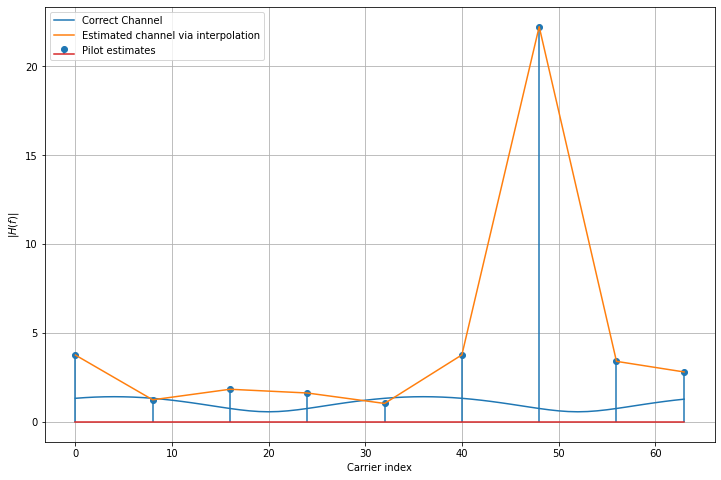

In [56]:
def channelEstimate(OFDM_demod):
    pilots = OFDM_demod[pilotCarriers]  # extract the pilot values from the RX signal
    Hest_at_pilots = pilots / 1 # pilotValue # divide by the transmitted pilot values
    
    # Perform interpolation between the pilot carriers to get an estimate
    # of the channel in the data carriers. Here, we interpolate absolute value and phase 
    # separately
    Hest_abs = scipy.interpolate.interp1d(pilotCarriers, abs(Hest_at_pilots), kind='linear')(allCarriers)
    Hest_phase = scipy.interpolate.interp1d(pilotCarriers, np.angle(Hest_at_pilots), kind='linear')(allCarriers)
    Hest = Hest_abs * np.exp(1j*Hest_phase)
    mplt.figure(figsize=(12,8))
    mplt.plot(allCarriers, abs(H_exact), label='Correct Channel')
    mplt.stem(pilotCarriers, abs(Hest_at_pilots), label='Pilot estimates')
    mplt.plot(allCarriers, abs(Hest), label='Estimated channel via interpolation')
    mplt.grid(True); mplt.xlabel('Carrier index'); mplt.ylabel('$|H(f)|$'); mplt.legend(fontsize=10)
#     mplt.ylim(0,2)
    
    return Hest
Hest = channelEstimate(OFDM_demod)

In [57]:
########### CDMA Signal Generation ########### 

In [37]:
from numpy import fft

def cconv(x, y):
    """Calculate the circular convolution of 1-D input numpy arrays using DFT
    From the Signal Processing Library: http://mubeta06.github.io/python/sp/filter.html
    """
    return fft.ifft(fft.fft(x)*fft.fft(y))

def ccorr(x, y):
    """Calculate the circular correlation of 1-D input numpy arrays using DFT
    From the Signal Processing Library: http://mubeta06.github.io/python/sp/filter.html
    """
    return fft.ifft(fft.fft(x)*fft.fft(y).conj())

def despread(composite, code, codelength):
    l = len(composite)//codelength
    despread = composite*(code*-2.0+1)
    recovered = []
    for i in range(l):
        recovered = np.append(recovered, 1.0*sum(despread[i*codelength:i*codelength+codelength])//codelength)
    recovered = np.repeat(recovered, codelength)
    return recovered


def bitfield(n):
    """Convert integer into bitfield (as list)
    From StackOverflow: http://stackoverflow.com/a/10322018/
    """
    return [int(digit) for digit in bin(n)[2:]] 


# Two Gold codes. See 
# Gold, R. "Optimal binary sequences for spread spectrum multiplexing (Corresp.)"
# IEEE Transactions on Information Theory. (October 1967)
g0 = np.array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0], dtype=int)
g30 = np.array([0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1])

codelength = len(g0) # 2^8 - 1 = 255

# Primary user data
p = 0x91
p = np.array(bitfield(p))
p_len = len(p)
p = np.repeat(p, codelength)
p_code = []
for i in range(p_len):
  p_code = np.append(p_code, g30)

p_spread = np.logical_xor(p_code, p).astype(int)

# First secondary user and his code
q = 0xc1
q = np.array(bitfield(q))
q_len = len(q)
q = np.repeat(q, codelength)
q_code = []
for i in range(q_len):
  q_code = np.append(q_code, g30)

q_spread = np.logical_xor(q_code, q).astype(int)

# Second secondary user and her code
r = 0xa5
r = np.array(bitfield(r))
r_len = len(r)
r = np.repeat(r, codelength)
r_code = []
for i in range(r_len):
  r_code = np.append(r_code, g0)

r_spread = np.logical_xor(r_code, r).astype(int)

# Composite sigal from all three users
composite = (p*2-1) + (r_spread*2-1) + (q_spread*2-1)

p_recovered = np.array([], dtype = float)
for i in range(p_len):
    p_recovered = np.append(p_recovered, 1.0*sum(composite[i*codelength:i*codelength+codelength])/codelength)
p_recovered = np.repeat(p_recovered, codelength)

r_recovered = despread(composite, r_code, codelength)
q_recovered = despread(composite, q_code, codelength)

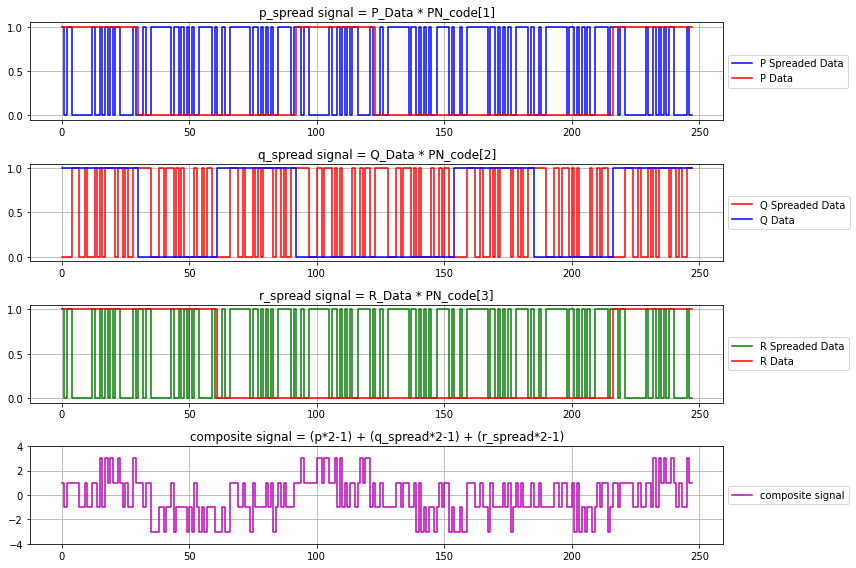

In [38]:
mplt.figure(figsize=(12,8))
mplt.subplot(411)
mplt.step(p_spread,'b', label="P Spreaded Data"); mplt.title("p_spread signal = P_Data * PN_code[1]");mplt.step(p,'r', label="P Data");mplt.grid();mplt.legend()
mplt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
mplt.subplot(412)
mplt.step(r_spread,'r', label="Q Spreaded Data"); mplt.title("q_spread signal = Q_Data * PN_code[2]");mplt.step(r,'b', label="Q Data");mplt.grid();mplt.legend()
mplt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
mplt.subplot(413)
mplt.step(q_spread,'g', label="R Spreaded Data"); mplt.title("r_spread signal = R_Data * PN_code[3]");mplt.step(q,'r', label="R Data");mplt.grid();mplt.legend()
mplt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
mplt.subplot(414)
mplt.step(composite, 'm', label="composite signal"); mplt.title("composite signal = (p*2-1) + (q_spread*2-1) + (r_spread*2-1)");mplt.ylim(-4,4)
mplt.tight_layout();mplt.legend();mplt.grid()

# Put a legend to the right of the current axis
mplt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# to save fig please uncomment below line
# mplt.savefig("CDMA_Operation_steps.png",dpi=200, transparent=False)

In [39]:
composite

array([ 1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1,  3,
       -1,  3,  1,  3,  1,  1,  3,  1, -1,  1, -1, -1,  3,  1,  1,  1, -1,
        1,  1, -3, -3, -3, -1, -1, -3, -1, -1,  1, -3, -1, -1, -1, -1, -3,
       -1, -3,  1, -1, -3, -1, -3, -1, -1, -1, -3, -3, -3, -1, -3, -3,  1,
        1,  1, -1, -1,  1, -1, -1, -3,  1, -1, -1, -1, -1,  1, -1,  1, -3,
       -1,  1, -1,  1, -1, -1, -1,  1,  1,  1,  3,  1,  1,  1,  1,  1,  3,
        3,  1,  3,  3,  1,  1,  3, -1,  3, -1,  1, -1,  1,  1, -1,  1,  3,
        1,  3,  3, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1,  1,
        1, -1, -1,  1, -3,  1, -3, -1, -3, -1, -1, -3, -1,  1, -1,  1,  1,
       -3, -1, -3, -3, -1, -3, -3,  1,  1,  1, -1, -1,  1, -1, -1, -3,  1,
       -1, -1, -1, -1,  1, -1,  1, -3, -1,  1, -1,  1, -1, -1, -1,  1, -1,
       -1,  1, -1, -1, -1, -1, -1,  1,  1, -1,  1,  1, -1, -1,  1, -3,  1,
       -3, -1, -3, -1, -1, -3, -1,  1, -1,  1,  1, -3, -1,  1,  1, -1,  1,
        1,  1,  1,  1, -1

In [40]:
cdma_tx_signal = np.genfromtxt('signals/cdmasignal.txt', delimiter=',')

In [41]:
# Transmit the baseband signal
bb << TxBasebandSignalReq(preamble=1, signal=tx_signal)

txntf4 = modem.receive(TxFrameNtf, 5000)
if txntf4 is not None:
    # Request a recording from txTime onwards for a duration of 2x the original transmitted signal.
    bb << RecordBasebandSignalReq(recTime=txntf4.txTime, recLength=(len(tx_signal)*2))
else:
    print('Transmission not successfull, try again!')

In [42]:
# Read the receive notification
rxntf4 = modem.receive(RxBasebandSignalNtf, 5000)

if rxntf is not None:
    # Extract the recorded signal
    rec_signal = rxntf4.signal
    print('Successfully recorded signal after transmission!')
    # The recorded signal is saved in `rec_signal` variable
    # It can be processed as required by the user.
else:
    print('Recording not successfull, try again!')

Successfully recorded signal after transmission!


In [43]:
plt.plot(rec_signal.real, title="CDMA recorded signal", width=900)

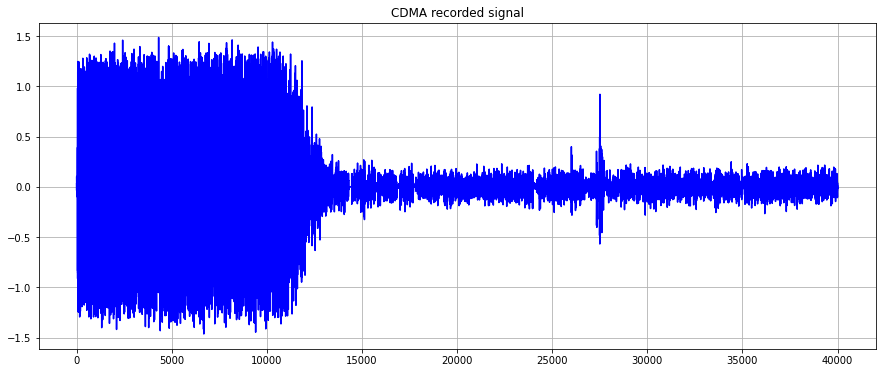

In [44]:
mplt.figure(figsize=(15,6))
mplt.plot(rec_signal.real,'b')
mplt.title("CDMA recorded signal")
mplt.grid()

In [45]:
## Repeat your baseband signal n times

ncomposite = np.repeat(composite,2)

np.savetxt("signals/ncomposite.txt", [ncomposite], delimiter=',', fmt="%s")   # ncomposite is an array

In [46]:
ncomposite

array([ 1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1,  3,  3,
       -1, -1,  3,  3,  1,  1,  3,  3,  1,  1,  1,  1,  3,  3,  1,  1, -1,
       -1,  1,  1, -1, -1, -1, -1,  3,  3,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1, -3, -3, -3, -3, -3, -3, -1, -1, -1, -1, -3, -3, -1,
       -1, -1, -1,  1,  1, -3, -3, -1, -1, -1, -1, -1, -1, -1, -1, -3, -3,
       -1, -1, -3, -3,  1,  1, -1, -1, -3, -3, -1, -1, -3, -3, -1, -1, -1,
       -1, -1, -1, -3, -3, -3, -3, -3, -3, -1, -1, -3, -3, -3, -3,  1,  1,
        1,  1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -3, -3,  1,
        1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1,  1, -3, -3,
       -1, -1,  1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1,  1,  1,  1,
        1,  1,  1,  3,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  3,
        3,  3,  1,  1,  3,  3,  3,  3,  1,  1,  1,  1,  3,  3, -1, -1,  3,
        3, -1, -1,  1,  1

In [47]:
ncdma_tx_signal = np.genfromtxt('signals/ncomposite.txt', delimiter=',')

In [48]:
plt.plot(ncdma_tx_signal.real, title="N times repeated CDMA recorded signal", width=900)

In [49]:
len(ncdma_tx_signal)

496

In [50]:
# Transmit the baseband signal
bb << TxBasebandSignalReq(preamble=3, signal=ncdma_tx_signal)

txntf4 = modem.receive(TxFrameNtf, 300000)
if txntf4 is not None:
    # Request a recording from txTime onwards for a duration of 2x the original transmitted signal.
    bb << RecordBasebandSignalReq(recTime=txntf4.txTime, recLength=(len(ncdma_tx_signal)*2))
else:
    print('Transmission not successfull, try again!')

In [51]:
# Read the receive notification
rxntf4 = modem.receive(RxBasebandSignalNtf, 300000)

if rxntf is not None:
    # Extract the recorded signal
    rec_signal = rxntf4.signal
    print('Successfully recorded signal after transmission!')
    # The recorded signal is saved in `rec_signal` variable
    # It can be processed as required by the user.
else:
    print('Recording not successfull, try again!')

Successfully recorded signal after transmission!


In [52]:
len(rec_signal)

992

In [53]:
plt.plot(rec_signal.real, title="N Times CDMA recorded signal", width=900)

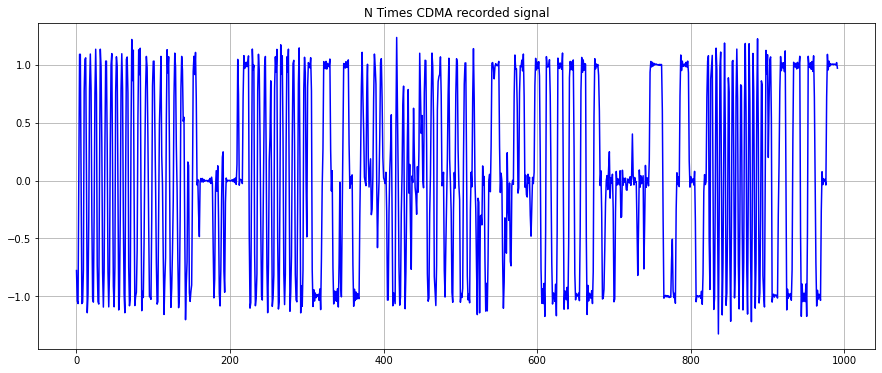

In [54]:
mplt.figure(figsize=(15,6))
mplt.plot(rec_signal.real,'b')
mplt.title("N Times CDMA recorded signal")
mplt.grid()

In [55]:
## Repeat your baseband signal n times

ncomposite = np.repeat(composite,10)

np.savetxt("signals/10ncomposite.txt", [ncomposite], delimiter=',', fmt="%s")   # ncomposite is an array

In [56]:
ncomposite

array([1, 1, 1, ..., 1, 1, 1])

In [57]:
len(ncomposite)

2480

In [58]:
ncdma_tx_signal = np.genfromtxt('signals/10ncomposite.txt', delimiter=',')

In [59]:
plt.plot(ncdma_tx_signal.real, title="10 times repeated CDMA recorded signal", width=900)

In [60]:
len(ncdma_tx_signal)

2480

In [61]:
# Transmit the baseband signal
bb << TxBasebandSignalReq(preamble=1, signal=ncdma_tx_signal)

txntf4 = modem.receive(TxFrameNtf, 20000)
if txntf4 is not None:
    # Request a recording from txTime onwards for a duration of 2x the original transmitted signal.
    bb << RecordBasebandSignalReq(recTime=txntf4.txTime, recLength=(len(ncdma_tx_signal)*2))
else:
    print('Transmission not successfull, try again!')

In [62]:
# Read the receive notification
rxntf4 = modem.receive(RxBasebandSignalNtf, 5000)

if rxntf is not None:
    # Extract the recorded signal
    rec_signal = rxntf4.signal
    print('Successfully recorded signal after transmission!')
    # The recorded signal is saved in `rec_signal` variable
    # It can be processed as required by the user.
else:
    print('Recording not successfull, try again!')

Successfully recorded signal after transmission!


In [63]:
plt.plot(rec_signal.real, title="10 Times CDMA recorded signal", width=900)

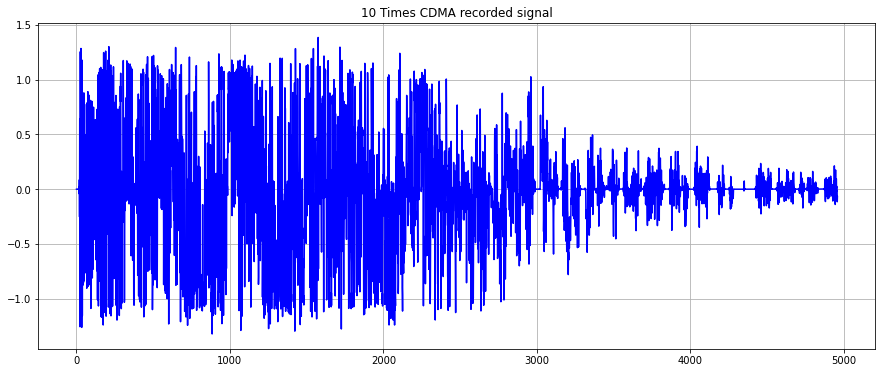

In [64]:
mplt.figure(figsize=(15,6))
mplt.plot(rec_signal.real,'b')
mplt.title("10 Times CDMA recorded signal")
mplt.grid()

In [65]:
plt.psd(rec_signal.real, fs=12000)

In [66]:
plt.specgram(rec_signal.real, fs=12000)

In [67]:
plt.specgram(rec_signal.real, fs=12000, clim=30)

In [68]:
################### Close connection to modem ################################

modem.close()